# Keywords 

### Load packages:

In [1]:
using TextAnalysis
using JSON, OAuth, Twitter
using Colors
using ColorSchemes
using JLD
using Statistics
using XLSX
using CSV
using DataFrames
using Dates
using LinearAlgebra
using StatsBase
using MultivariateStats

### Plotting settings:

In [2]:
import Plots
import PyPlot
Plots.pyplot()

plt = PyPlot

SMALL_SIZE = 10
MEDIUM_SIZE = 11
BIGGER_SIZE = 12

plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

colors = vcat([0 0 0 0], plt.cm.YlOrRd(range(0, stop=1, length=10))[2:end,:]);

### Define some useful functions:

In [3]:
conv_to_hour(date) = dayofyear.(date).*24 .+ hour.(date)
conv_to_minumte(date) = dayofyear.(date).*24.0 .* 60.0 .+ hour.(date) .* 60.0 .+ minute.(date)
conv_to_seconds(date) = dayofyear.(date).*24.0 .* 60.0 .* 60.0 .+ hour.(date) .* 60.0 .* 60.0 .+ minute.(date) .* 60.0 .+ second.(date)
conv_to_hmin(date) = hour.(date) .* 60.0 .+ minute.(date) 

function linreg(x, y; bias_c=true)
    
	X = Array{Float64}(undef, length(x),1)
	Y = Vector{Float64}(undef, length(y))
	X[1:length(x),1] .= x
	Y[1:length(y)] .= y
	sol = llsq(X, Y)
	coeff, bias = sol[1], sol[2]
    
    if bias_c == true
        g1(x) = bias + coeff*x 
        return g1, (coeff, bias)
    end
    
    if bias_c == false
        g2(x) = coeff*x
        return g2, (coeff, bias)
    end
    
end

linreg (generic function with 1 method)

### Load data files:

In [4]:
new_df = XLSX.readxlsx("covid-en.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

data_tmp = new_df["A2:$stop_ind"];

df_1 = DataFrame(data_tmp,  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang]);

In [5]:
new_df = XLSX.readxlsx("positive-en.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

data_tmp = new_df["A2:$stop_ind"];

df_2 = DataFrame(data_tmp,  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang]);

In [6]:
new_df = XLSX.readxlsx("negative-en.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

data_tmp = new_df["A2:$stop_ind"];

df_3 = DataFrame(data_tmp,  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang]);

In [7]:
new_df = XLSX.readxlsx("neutral-en.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

data_tmp = new_df["A2:$stop_ind"];

df_4 = DataFrame(data_tmp,  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang]);

# Short Summary

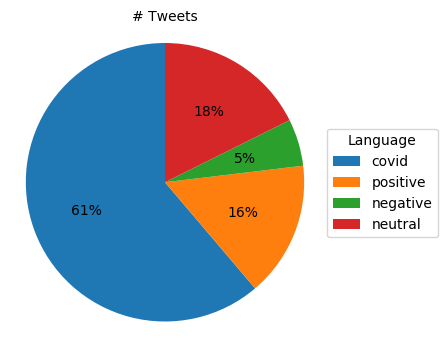

In [8]:
labels = ["covid", "positive", "negative", "neutral"]
sizes = [size(df_1)[1], size(df_2)[1], size(df_3)[1],   size(df_4)[1]]
explode = (0, 0.0, 0.0, 0.0) 
sizes = sizes ./ sum(sizes)

fig, ax = plt.subplots(1,1, figsize=(4, 4))

fig.subplots_adjust(hspace=0.03, wspace=0.03)

ax.pie(sizes, explode=explode, startangle=90, autopct="%1.f%%")
ax.set_title("# Tweets")
ax.axis("equal");

ax.legend(labels, title="Language", loc="center left", bbox_to_anchor=(1, 0, 0.6, 1));

# Minute-resolution scale

In [9]:
time_1 = conv_to_minumte.(DateTime.(df_1[:,3]))
time_2 = conv_to_minumte.(DateTime.(df_2[:,3]))
time_3 = conv_to_minumte.(DateTime.(df_3[:,3]))
time_4 = conv_to_minumte.(DateTime.(df_4[:,3]))

# since_i = minimum(minimum.([time_1, time_2, time_3, time_4, time_5, time_6]))
since_i = conv_to_minumte(DateTime("2020-04-19T09:20:56.239"))

time_1 = time_1 .- since_i
time_2 = time_2 .- since_i
time_3 = time_3 .- since_i
time_4 = time_4 .- since_i

# bins = 0:40:maximum(maximum.([time_1, time_2, time_3, time_4, time_5, time_6]))+40
# bins = 0:-40:minimum(minimum.([time_1, time_2, time_3, time_4, time_5, time_6]))-40
bins = minimum(minimum.([time_1, time_2, time_3, time_4]))-40:50:0

-11164.0:50.0:-14.0

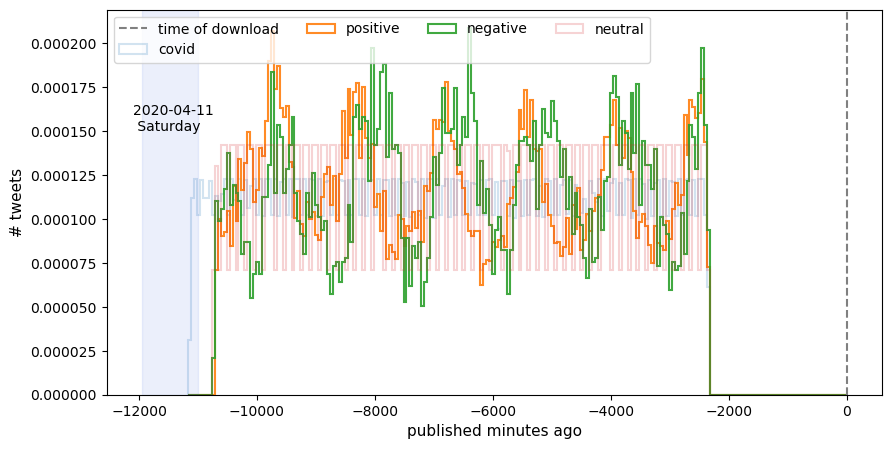

PyObject Text(25.0, 0.5, '# tweets')

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

ax.hist(time_1, bins=bins, histtype="step", density=true, color="C0", lw=1.5, alpha=0.2, label="covid")
ax.hist(time_2, bins=bins, histtype="step", density=true, color="C1", lw=1.5, alpha=0.9, label="positive")
ax.hist(time_3, bins=bins, histtype="step", density=true, color="C2", lw=1.5, alpha=0.9, label="negative")
ax.hist(time_4, bins=bins, histtype="step", density=true, color="C3", lw=1.5, alpha=0.2, label="neutral")

ax.axvline(0, color="gray", ls="--", label="time of download")
ax.axvspan(-11950, -11000, alpha=0.1, color="royalblue")

ax.text(-12100, 0.00015, "2020-04-11 \n Saturday",)

ax.legend(loc="upper left", frameon=true, framealpha=0.8, ncol=4)

ax.set_xlabel("published minutes ago")
ax.set_ylabel("# tweets")

# Periodic hour-resolution scale

Let us see how the activity of users is distributed during the day 

In [11]:
x_1 = hour.(DateTime.(df_1[:,3]))
y_1 = df_1[:,2]
(f1, info_1) = linreg(x_1, y_1, bias_c=false)

x_2 = hour.(DateTime.(df_2[:,3]))
y_2 = df_2[:,2]
(f2, info_2) = linreg(x_2, y_2, bias_c=false)

x_3 = hour.(DateTime.(df_3[:,3]))
y_3 = df_3[:,2]
(f3, info_3) = linreg(x_3, y_3, bias_c=false)

x_4 = hour.(DateTime.(df_4[:,3]))
y_4 = df_4[:,2]
(f4, info_4) = linreg(x_4, y_4, bias_c=false)

(var"#g2#5"{Float64}(-0.012197475644913115), (-0.012197475644913115, 4.823506243368213))

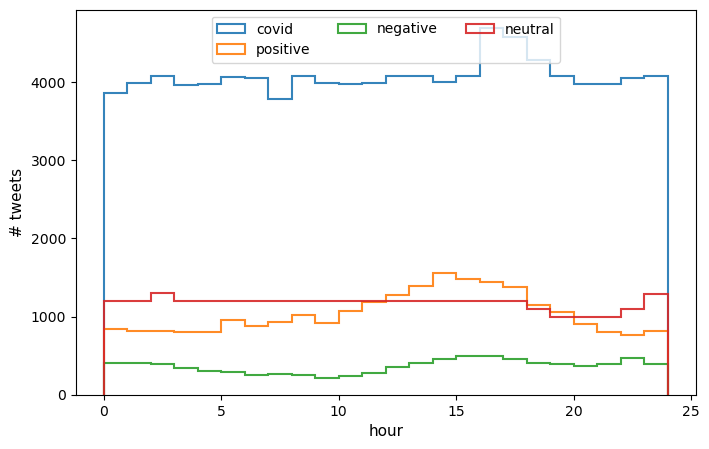

PyObject Text(25.0, 0.5, '# tweets')

In [12]:
bins=0:1:24

fig, ax = plt.subplots(1,1, figsize=(8, 5))

ax.hist(x_1, bins=bins, histtype="step", density=false, color="C0", lw=1.5, alpha=0.9, label="covid")
ax.hist(x_2, bins=bins, histtype="step", density=false, color="C1", lw=1.5, alpha=0.9, label="positive")
ax.hist(x_3, bins=bins, histtype="step", density=false, color="C2", lw=1.5, alpha=0.9, label="negative")
ax.hist(x_4, bins=bins, histtype="step", density=false, color="C3", lw=1.5, alpha=0.9, label="neutral")

ax.legend(loc="upper center", frameon=true, framealpha=0.8, ncol=3)

ax.set_xlabel("hour")
ax.set_ylabel("# tweets")

# Retweets vs. Favorite activity

Let us see which audience is more active

In [13]:
mask_1 = (df_1[:,1] .> 0) .*  (df_1[:,2] .> 0)
x_1 = df_1[:,2][mask_1]
y_1 = df_1[:,1][mask_1]
(f1, info_1) = linreg(x_1, y_1, bias_c=false)

mask_2 = (df_2[:,1] .> 0) .*  (df_2[:,2] .> 0)
x_2 = df_2[:,2][mask_2]
y_2 = df_2[:,1][mask_2]
(f2, info_2) = linreg(x_2, y_2, bias_c=false)

mask_3 = (df_3[:,1] .> 0) .*  (df_3[:,2] .> 0)
x_3 = df_3[:,2][mask_3]
y_3 = df_3[:,1][mask_3]
(f3, info_3) = linreg(x_3, y_3, bias_c=false)

mask_4 = (df_4[:,1] .> 0) .*  (df_4[:,2] .> 0)
x_4 = df_4[:,2][mask_4]
y_4 = df_4[:,1][mask_4]
(f4, info_4) = linreg(x_4, y_4, bias_c=false)


(var"#g2#5"{Float64}(0.1955712608360265), (0.1955712608360265, 1.7010264975813054))

In [14]:
bins = collect(0:1:maximum(df_1[:,2]));

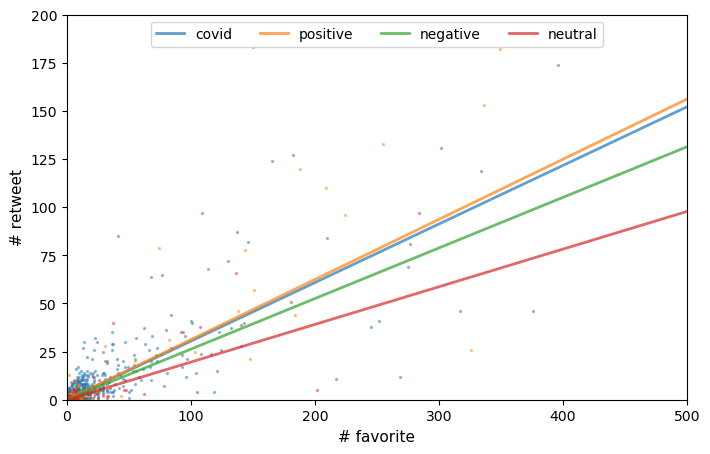

PyObject <matplotlib.legend.Legend object at 0x7ffdde0507d0>

In [16]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))

ax.scatter(x_1[1:30:end], y_1[1:30:end], color="C0", s=2, alpha=0.4)
ax.scatter(x_2[1:30:end], y_2[1:30:end], color="C1", s=2, alpha=0.4)
ax.scatter(x_3[1:30:end], y_3[1:30:end], color="C2", s=2, alpha=0.4)
ax.scatter(x_4[1:30:end], y_4[1:30:end], color="C3", s=2, alpha=0.4)

ax.plot(bins, f1.(bins), color="C0", alpha=0.7, lw=2, label="covid")
ax.plot(bins, f2.(bins), color="C1", alpha=0.7, lw=2, label="positive")
ax.plot(bins, f3.(bins), color="C2", alpha=0.7, lw=2, label="negative")
ax.plot(bins, f4.(bins), color="C3", alpha=0.7, lw=2, label="neutral")


ax.set_xlim(0, 500)
ax.set_ylim(0, 200)

ax.set_ylabel("# retweet")
ax.set_xlabel("# favorite")

ax.legend(loc="upper center", frameon=true, framealpha=0.8, ncol=6)